<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Processo-batelada---Monod/blob/main/Batelada_Monod_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processo Batelada Sem Alimentação - Monod**

In [65]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import Image

In [62]:
img1 = Image(filename='eq_mi_monod.PNG', size)
img2 = Image(filename='eq_cel_monod.PNG')
img3 = Image(filename='eq_subst_monod.PNG')
img4 = Image(filename='eq_prod1.PNG')
img5 = Image(filename='eq_prod2.PNG')
img6 = Image(filename='eq_prod3.PNG')

### Por Monod, mi não é mais constante e depende do substrato

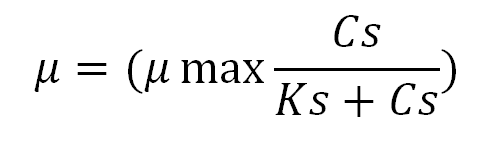

In [64]:
img1

### Com isso, a equação para a variação celular assume uma nova forma

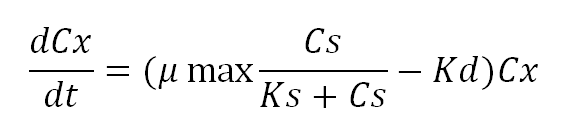

In [69]:
img2

###Como a variação celular agora depende do substrato, é necessário também equacionar a variação do substrato no sistema

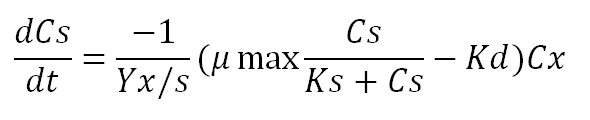

In [70]:
img3

### Já o cálculo para a formação de produto é bem simples, porém depende se o produto é associado ao crescimento, não associado ou parcialmente associado.

###Para o produto associado ao crescimento tem-se:




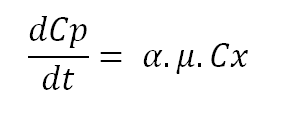

In [71]:
img4

###Para o produto não associado ao crescimento, tem-se:

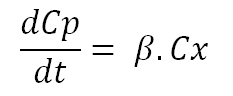

In [72]:
img5

###E para o produto parcialmente associado ao crescimento, tem-se:

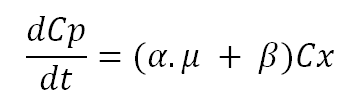

In [73]:
img6

In [35]:
#Definindo as condições
mimax = 0.5 #unidade 1/hora - taxa específica de crescimento
Ks = 1.5 #constante de semi-saturação
Cx0 = 1.0 #  concentração inicial de microrganismo
Cs0 = 50.0 #concentração inicial de substrato
Cp0 = 0.0 #concentração inicial de produto
Yxs = 0.5 #coeficiente estequiométrico
kd = 0.05 #constante de morte celular
alfa = 0.5 #constante do produto associado ao crescimento
beta = 0.2 #constante do produto não associado ao crescimento

In [36]:
#Definindo as EDO's
def edo(C, t):  
  Cx, Cs, Cp1, Cp2, Cp3 = C
  mi = mimax * (Cs / (Ks + Cs)) #Monod
  dCxdt = (mi - kd) * Cx #eq para célula
  dCsdt = - (1/Yxs) * (mi - kd) * Cx #eq para o substrato
  dCp1dt = alfa * mi * Cx #eq do produto associado ao crescimento
  dCp2dt = beta * Cx #eq do produto não associado ao crescimento
  dCp3dt = ((alfa * mi) + beta ) * Cx #eq do produto parcialmente associado ao crescimento
  return dCxdt, dCsdt, dCp1dt, dCp2dt, dCp3dt

In [37]:
#Definindo a solução da edo
t = np.linspace(0, 15, 200) #vetor tempo em horas
ConcentI = Cx0, Cs0, Cp0, Cp0, Cp0
sol = odeint(edo, ConcentI, t)

In [38]:
#Vetor com a concentração de células
Cx = sol[:,0]
#Vetor com a concentração de substrato
Cs = sol[:,1]
#Vetors com as concentrações de produto
Cp1 = sol[:,2]
Cp2 = sol[:,3]
Cp3 = sol[:,4]

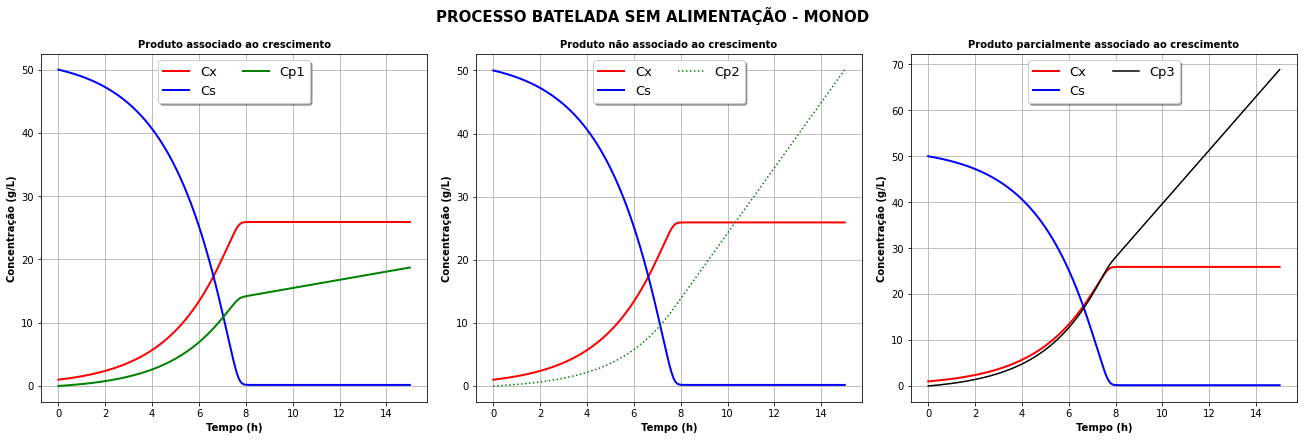

In [76]:
#Plotando o gráfico da solução
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, constrained_layout = True)
_ = fig.suptitle("PROCESSO BATELADA SEM ALIMENTAÇÃO - MONOD", weight ='bold', size = 15)
plt.rc('axes', titlesize=10)     
plt.rc('axes', labelsize=10)   
func1 = ax1.plot(t, Cx, 'r-', linewidth = 2, label = 'Cx'), ax2.plot(t, Cx, 'r-', linewidth = 2, label = 'Cx'), ax3.plot(t, Cx, 'r-', linewidth = 2, label = 'Cx')
func2 = ax1.plot(t, Cs, 'b-', linewidth = 2, label = 'Cs'), ax2.plot(t, Cs, 'b-', linewidth = 2, label = 'Cs'), ax3.plot(t, Cs, 'b-', linewidth = 2, label = 'Cs')
func3 = ax1.plot(t, Cp1, 'g-', linewidth = 2, label = 'Cp1')
func4 = ax2.plot(t, Cp2, ':g', label = 'Cp2')
fun5 = ax3.plot(t, Cp3, 'k-', label = 'Cp3') 
ax1.set_title("Produto associado ao crescimento", weight ='bold') 
ax1.set_xlabel('Tempo (h)',weight='bold')               
ax1.set_ylabel('Concentração (g/L)', weight='bold')
ax1.grid(True)
ax2.set_title("Produto não associado ao crescimento", weight ='bold')    
ax2.set_xlabel('Tempo (h)',weight='bold')               
ax2.set_ylabel('Concentração (g/L)', weight='bold')
ax2.grid(True)
ax3.set_title("Produto parcialmente associado ao crescimento", weight ='bold') 
ax3.set_xlabel('Tempo (h)',weight='bold')               
ax3.set_ylabel('Concentração (g/L)', weight='bold')
ax3.grid(True)
plt.rc('legend', fontsize=13) 
ax1.legend(loc='upper center',ncol=2, shadow=True)
ax2.legend(loc='upper center',ncol=2, shadow=True)
ax3.legend(loc='upper center',ncol=2, shadow=True)
fig.set_figheight(6)                                                 
fig.set_figwidth(18)          
plt.show()